## Линейные модели. 
## Библиотека sklearn.

про sklearn http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from sklearn import datasets, linear_model
from sklearn import cross_validation, datasets, linear_model, metrics

## 1. Линейная регрессия.

Набор данных diabetes состоит из 10 физиологических признаков (возраст, пол, вес, давление и т.д.) измеренных у 442ух пациентов и индикатор прогрессирования болезни через год.
Задача - предсказать возникновение болезни исходя их физиологических параметров (признаков) человека.

Линейная регрессия - один из наиболее хорошо изученных методов машинного обучения, позволяющий прогнозировать значения количественного признака в виде линейной комбинации прочих признаков с параметрами - весами модели. Оптимальные (в смысле минимальности некоторого функционала ошибки) параметры линейной регрессии можно найти аналитически с помощью нормального уравнения или численно с помощью методов оптимизации. 

## 1.1. Использование встроенного метода 

In [72]:
# Загрузим датасет
diabetes = datasets.load_diabetes()
diabetes_df = pd.DataFrame(diabetes.data)
diabetes_df['target'] = diabetes.target
# Разделим выборку на тестовую и тренировочную.
diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = cross_validation.train_test_split(diabetes_df.drop('target', axis = 1), diabetes_df['target'], test_size = 0.3)

In [73]:
diabetes_df.head()

,0,1,2,3,4,5,6,7,8,9,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [74]:
diabetes_y_test.shape

(133,)

In [75]:
linear_regressor = linear_model.LinearRegression(fit_intercept=True, normalize=True)
linear_regressor.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [76]:
linear_regressor.coef_

array([ -32.63288277, -232.55667991,  616.70090146,  295.35167295,
       -561.19173438,  347.87762348,  -15.63768884,   55.98336555,
        670.31837643,   25.41927842])

In [77]:
linear_regressor.intercept_

148.88728282350925

In [9]:
#sns.pairplot(diabetes_df)

In [78]:
metrics.mean_absolute_error(diabetes_y_test, linear_regressor.predict(diabetes_X_test))

44.914573605746028

In [11]:
linear_regressor.score(diabetes_X_test, diabetes_y_test)

0.40852303295357861

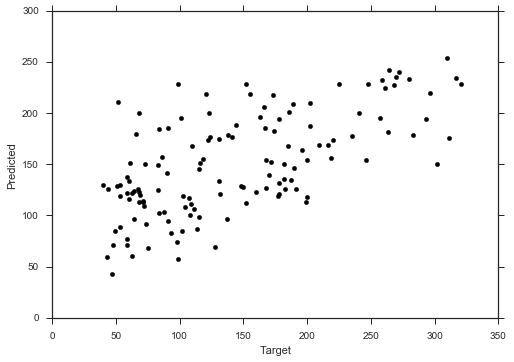

In [12]:
plt.scatter(diabetes_y_test, linear_regressor.predict(diabetes_X_test),  color='black')
plt.xlabel('Target')
plt.ylabel('Predicted')
plt.show()

## А что будет, если предсказывать по одному признаку?

In [41]:
diabetes_df = pd.DataFrame(diabetes.data[:,0])
diabetes_df['target'] = diabetes.target
diabetes_df.head()
# Разделим выборку на тестовую и тренировочную.
diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = cross_validation.train_test_split(diabetes_df.drop('target', axis = 1), diabetes_df['target'], test_size = 0.3)

In [42]:
linear_regressor = linear_model.LinearRegression(fit_intercept=True, normalize=True)
linear_regressor.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [43]:
linear_regressor.coef_

array([ 277.6875902])

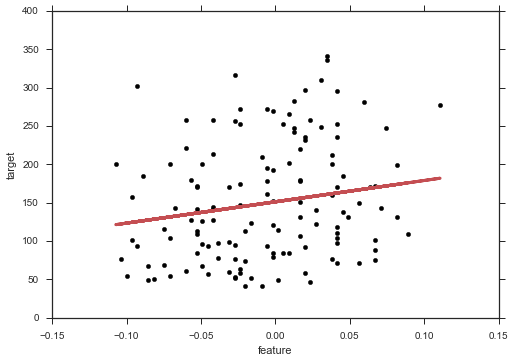

In [44]:
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, linear_regressor.predict(diabetes_X_test),  color='r', linewidth=3)
plt.xlabel('feature')
plt.ylabel('target')
plt.show()

In [45]:
metrics.mean_absolute_error(diabetes_y_test, linear_regressor.predict(diabetes_X_test))

63.305417973119894

In [46]:
linear_regressor.score(diabetes_X_test, diabetes_y_test)

0.049258971622478158

## 1.2. Линейная регрессия и стохастический градиентный спуск

Линейная регрессия использует простой функционал качества - среднеквадратичную ошибку. Мы будем работать с выборкой, содержащей 3 признака. Для настройки параметров (весов) модели решается следующая задача:
$$\frac{1}{\ell}\sum_{i=1}^\ell{{(y_i - (w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}))}^2} \rightarrow \min_{w_0, w_1, w_2, w_3},$$
где $x_{i1}, x_{i2}, x_{i3}$ - значения признаков $i$-го объекта, $y_i$ - значение целевого признака $i$-го объекта, $\ell$ - число объектов в обучающей выборке.

## Нормальное уравнение 
Нахождение вектора оптимальных весов $w$ может быть сделано и аналитически.
Мы хотим найти такой вектор весов $w$, чтобы вектор $y$, соответствующий целевому признаку, получался умножением матрицы $X$ (состоящей из всех признаков объектов обучающей выборки, кроме целевого) на вектор весов $w$. То есть, чтобы выполнялось матричное уравнение:
$$y = Xw$$
Домножением слева на $X^T$ получаем:
$$X^Ty = X^TXw$$
Это хорошо, поскольку теперь матрица $X^TX$ - квадратная, и можно найти решение (вектор $w$) в виде:
$$w = {(X^TX)}^{-1}X^Ty$$
Матрица ${(X^TX)}^{-1}X^T$ - [*псевдообратная*](https://ru.wikipedia.org/wiki/Псевдообратная_матрица) для матрицы $X$. В NumPy такую матрицу можно вычислить с помощью функции [numpy.linalg.pinv](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.pinv.html).

Однако, нахождение псевдообратной матрицы - операция вычислительно сложная и нестабильная в случае малого определителя матрицы $X$ (проблема мультиколлинеарности). 
На практике лучше находить вектор весов $w$ решением матричного уравнения 
$$X^TXw = X^Ty$$Это может быть сделано с помощью функции [numpy.linalg.solve](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.linalg.solve.html).

Но все же на практике для больших матриц $X$ быстрее работает градиентный спуск, особенно его стохастическая версия.

In [80]:
# Загрузим датасет
diabetes = datasets.load_diabetes()
diabetes_df = pd.DataFrame(diabetes.data[:,:3])
diabetes_df['target'] = diabetes.target
diabetes_df.head()

,0,1,2,target
0,0.038076,0.050680,0.061696,151.0
1,-0.001882,-0.044642,-0.051474,75.0
2,0.085299,0.050680,0.044451,141.0
3,-0.089063,-0.044642,-0.011595,206.0
4,0.005383,-0.044642,-0.036385,135.0


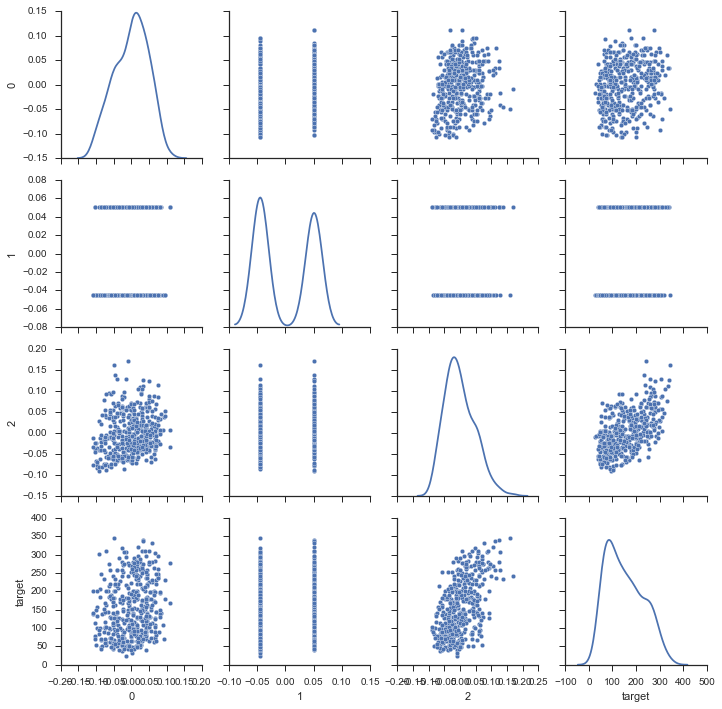

In [81]:
sns.pairplot(diabetes_df, palette="husl", diag_kind="kde", size=2.5)

In [558]:
#g = sns.PairGrid(diabetes_df, hue='target', palette="GnBu_d")
#g.map(plt.scatter, s=50, edgecolor="white")
#g.add_legend()

In [82]:
X = diabetes_df.ix[:,:3]
y = diabetes_df.target

#масштабирование данных
means = X.apply(np.mean)
stds = X.apply(np.std)

In [83]:
X = X.apply(lambda x: (x - means)/stds, axis = 1)

In [84]:
##Вектор из единиц нужен для того, чтобы не обрабатывать отдельно коэффициент $w_0$ линейной регрессии.
X[3] = 1

In [85]:
X = X.values
y = y.values

## Функция *mserror* - среднеквадратичная ошибка прогноза.

In [86]:
def mserror(y, y_pred):
    return sum(map(lambda x1, x2: (x1 - x2) ** 2, y, y_pred))/len(y)

## Решение нормального уравнения для нахождения вектора весов w $$X^TXw = X^Ty$$

In [87]:
def normal_equation(X, y):
    A = np.dot(np.transpose(X), X)
    b = np.dot(np.transpose(X), y)
    w = np.linalg.solve(A, b)
    return w

def linear_prediction(X, w):
    return np.dot(X, w.reshape(4, 1))

In [88]:
w = normal_equation(X, y)
print(w)

[   6.60698527   -1.71877936   44.08870835  152.13348416]


In [68]:
X.shape

(442, 4)

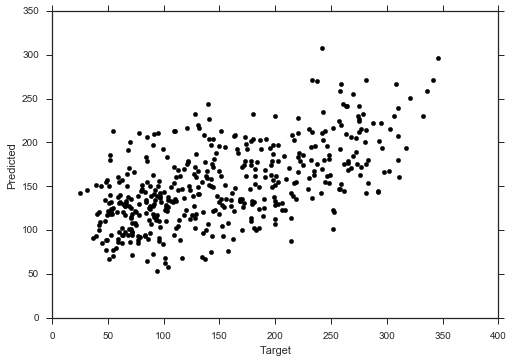

In [89]:
plt.scatter(y, linear_prediction(X, w),  color='black')
plt.xlabel('Target')
plt.ylabel('Predicted')

In [70]:
#print mserror(y, linear_prediction(X, w))

## Градиентный спуск

http://scikit-learn.org/stable/modules/sgd.html


Параметры $w_0, w_1, w_2, w_3$, по которым минимизируется среднеквадратичная ошибка, можно находить численно с помощью градиентного спуска.
Градиентный шаг для весов будет выглядеть следующим образом:
$$w_0 \leftarrow w_0 + \frac{2\eta}{\ell} \sum_{i=1}^\ell{{(y_i - (w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}))}}$$
$$w_j \leftarrow w_j + \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}(y_i - (w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}))}},\ j \in \{1,2,3\}$$
Здесь $\eta$ - параметр, шаг градиентного спуска.

## Стохастический градиентный спуск
У градиентного спуска, описанного выше, есть один недостаток. На больших выборках вычисление градиента по всем имеющимся данным на каждом шаге может быть вычислительно сложно. 
В стохастическом варианте градиентного спуска поправки для весов вычисляются только с учетом одного случайно взятого объекта обучающей выборки:
$$w_0 \leftarrow w_0 + \frac{2\eta}{\ell} {(y_k - (w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}))}$$
$$w_j \leftarrow w_j + \frac{2\eta}{\ell} {x_{kj}(y_k - (w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}))},\ j \in \{1,2,3\},$$
где $k$ - случайный индекс, $k \in \{1, \ldots, \ell\}$.


Функция принимает на вход следующие аргументы:
- X - матрица, соответствующая обучающей выборке
- y - вектор значений целевого признака
- w_init - вектор начальных весов модели
- eta - шаг градиентного спуска (по умолчанию 0.01)
- max_iter - максимальное число итераций градиентного спуска (по умолчанию 10000)
- max_weight_dist - минимальное евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,
при котором алгоритм прекращает работу (по умолчанию 1e-8)
- seed - число, используемое для воспроизводимости сгенерированных псевдослучайных чисел (по умолчанию 42)
- verbose - флаг печати информации (например, для отладки, по умолчанию False)

На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.

In [37]:
def sgd_step(X, y, w, eta, index):
    l = len(y)
    x_k = X.values[index]
    y_k = y.values[index]
    return w + (2*eta*x_k/l)*(y_k - np.dot(w, x_k))

In [38]:
def sgd_step(X, y, w, train_ind, eta=0.01):
    l = len(y)
    x_k = X.values[train_ind]
    y_k = y.values[train_ind]
    return w + 2*eta/l*x_k*(y_k - np.dot(w, x_k))

In [39]:
def SGD(X, y, w_init, eta = 0.1, max_iter = 1e5, max_weights_dist = 1e-8, seed = 42):
    
    weight_dist = np.inf
    w = w_init
    errors = []
    iter_number = 0
    np.random.seed(seed)
    
    while weight_dist > max_weights_dist and iter_number < max_iter:
            if iter_number % 1000 == 0:
                print iter_number
            # порождаем псевдослучайный 
            # индекс объекта обучающей выборки
            random_ind = np.random.randint(X.shape[0])
            w_next = sgd_step(X, y, w, random_ind, eta )
            y_pred = linear_prediction(X, w)
            errors.append(mserror(y, linear_prediction(X, w)))
            weight_dist = np.linalg.norm(w - w_next)
            iter_number += 1
            w = w_next
    
    return w, errors

In [40]:
X = diabetes_df.ix[:,:3]
y = diabetes_df.target

In [721]:
%%time
sgd_weights, sgd_errors = SGD(X, y, np.zeros(3), max_iter = 1e5)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
CPU times: user 2min 28s, sys: 464 ms, total: 2min 29s
Wall time: 2min 29s


In [71]:
#%pylab inline
#plot(range(len(sgd_errors)), sgd_errors)
#xlabel('Iteration number')
#ylabel('MSE')